# ITER use cases

In [1]:
using Revise
using FUSE
using Plots; gr();
FUSE.logging(Logging.Info; actors=Logging.Debug);

### Initialize `dd`, `ini`, `act` from ITER use case

In [2]:
dd0, ini0, act0 = FUSE.init(:ITER, init_from=:ods)

ini, act = FUSE.case_parameters(:ITER, init_from=:ods);

[ Info: HCD


[ Info:  ECsimple


[ Info:  ICsimple


[ Info:  LHsimple


[ Info:  NBsimple


[ Info: SteadyStateCurrent


[ Info: CXbuild


In [4]:
#ini.material.blanket = "lithium-lead"

ini.build.n_first_wall_conformal_layers = 7

ini.tf.shape = :princeton_D_scaled

ini.nb_unit[1].power_launched = 20e6
ini.ec_launcher[1].power_launched = 30e6
ini.ic_antenna[1].power_launched = 0e6

ini.equilibrium.B0 = 5.3

ini.core_profiles.greenwald_fraction = 0.92
ini.core_profiles.greenwald_fraction_ped = 0.75 # 0.675
ini.core_profiles.zeff = 1.29
ini.core_profiles.n_shaping = 1.0
ini.core_profiles.T_shaping = 2.0
ini.core_profiles.T_ratio = 15.4/16.2
#ini.core_profiles.ne_coreped_ratio = 1.1
ini.core_profiles.helium_fraction = 0.025
ini.equilibrium.pressure_core = 670e3

ini.requirements.flattop_duration = 500.0


500.0

In [5]:
act.ActorEquilibrium.model = :TEQUILA
act.ActorTEQUILA.ip_from = :equilibrium
act.ActorTEQUILA.free_boundary = true

act.ActorPFcoilsOpt.optimization_scheme = :currents
act.ActorPFcoilsOpt.update_equilibrium = true
act.ActorPFcoilsOpt.symmetric = false
act.ActorPFcoilsOpt.do_plot = false #true
act.ActorPFcoilsOpt.verbose = true

act.ActorCoreTransport.model = :FixedProfiles #:FluxMatcher

act.ActorFixedProfiles.T_shaping = ini.core_profiles.T_shaping
act.ActorFixedProfiles.n_shaping = ini.core_profiles.n_shaping
act.ActorFixedProfiles.T_ratio_core = ini.core_profiles.T_ratio


act.ActorStabilityLimits.raise_on_breach = false

act.ActorWholeFacility.update_plasma = true
act.ActorWholeFacility.update_build = false

act.ActorFluxSwing.operate_oh_at_j_crit = false

act.ActorStationaryPlasma.max_iter = 10
act.ActorStationaryPlasma.verbose = true
act.ActorStationaryPlasma.convergence_error = 0.01

act.ActorCosting.model = :Sheffield

act.ActorECsimple.rho_0 = 0.2


0.2

[ Info: HCD
[ Info:  ECsimple


[ Info:  ICsimple


[ Info:  LHsimple


[ Info:  NBsimple


[ Info: SteadyStateCurrent


[ Info: CXbuild


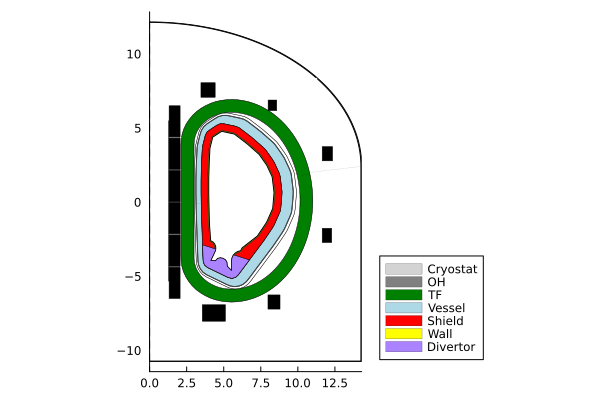

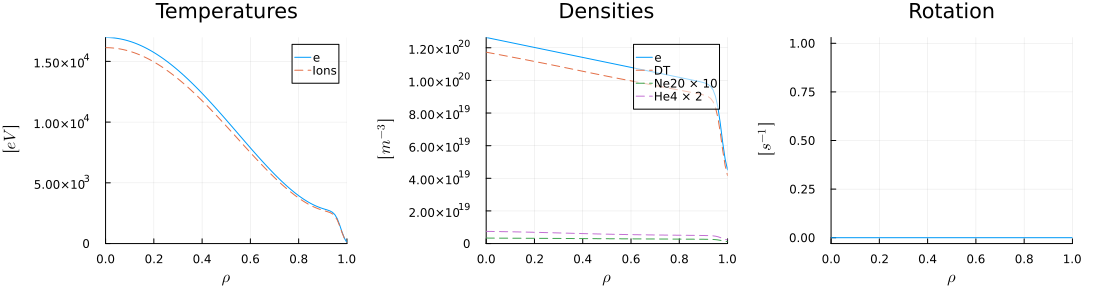

In [6]:
dd = FUSE.init(ini, act);
if false
    for (cs,(z,I)) in enumerate(zip(
        [5.435, 3.265, 1.095, -1.075, -3.245, -5.415],
        [3.93e6, -6.43e6, -17.52e6, -17.52e6, -5.59e6, 6.62e6],
        ))
        dd.pf_active.coil[cs].element[1].geometry.rectangle.r = 1.696
        dd.pf_active.coil[cs].element[1].geometry.rectangle.z = z
        dd.pf_active.coil[cs].element[1].geometry.rectangle.width = 0.734
        dd.pf_active.coil[cs].element[1].geometry.rectangle.height = 2.12
        dd.pf_active.coil[cs].identifier = "fixed" #"pinned"
        dd.pf_active.coil[cs].current.data = [I]
        dd.pf_active.coil[cs].element[1].turns_with_sign = 1.0
    end

    for (pf,(r,z,dR,dZ,I)) in enumerate(zip(
        [3.944, 8.285, 11.980, 11.960, 8.391, 4.334],
        [7.574, 6.540, 3.275, -2.234, -6.727, -7.467],
        [0.959, 0.580, 0.680, 0.640, 0.812, 1.559],
        [0.984, 0.715, 0.954, 0.954, 0.954, 1.107],
        [6.91e6, -2.34e6, -6.04e6, -4.71e6, -7.76e6, 18.36e6],
        ))
        dd.pf_active.coil[pf+6].element[1].geometry.rectangle.r = r
        dd.pf_active.coil[pf+6].element[1].geometry.rectangle.z = z
        dd.pf_active.coil[pf+6].element[1].geometry.rectangle.width = dR
        dd.pf_active.coil[pf+6].element[1].geometry.rectangle.height = dZ
        dd.pf_active.coil[pf+6].identifier = "fixed" #"pinned"
        dd.pf_active.coil[pf+6].current.data = [I]
        dd.pf_active.coil[pf+6].element[1].turns_with_sign = 1.0

    end
end

plot(dd.build)
p = plot!(dd.pf_active)
q = plot(dd.core_profiles)

display(p)
display(q)

In [7]:

if true
    FUSE.ActorWholeFacility(dd, act, update_plasma=true, update_build=false);
end

if false
    #FUSE.ActorTEQUILA(dd, act);
    FUSE.ActorFluxSwing(dd, act);
    FUSE.ActorStresses(dd, act);
    FUSE.ActorCXbuild(dd, act);
    FUSE.ActorPassiveStructures(dd, act);
    FUSE.ActorPFcoilsOpt(dd, act);
    FUSE.ActorNeutronics(dd, act);
    FUSE.ActorBlanket(dd, act);
    #FUSE.ActorDivertors(dd, act;)
    #FUSE.ActorBalanceOfPlant(dd, act);
    #FUSE.ActorCosting(dd, act);
end

dd.build.tf

[ Info: WholeFacility


[ Info:  StationaryPlasma


Progress:   4%|█                          |  ETA: 0:00:40 ( 0.72  s/it)
           iteration (min 2):  0/10
  required convergence error:  0.01
         convergence history:  N/A
                       stage:  Current
                     Ip [MA]:  15.175242005764536
                   Te0 [keV]:  16.968672004488585









Progress:   7%|█▉                         |  ETA: 0:00:51 ( 0.96  s/it)
           iteration (min 2):  0/10
  required convergence error:  0.01
         convergence history:  N/A
                       stage:  NoOperation
                     Ip [MA]:  15.175242005764536
                   Te0 [keV]:  16.968672004488585









Progress:  11%|██▉                        |  ETA: 0:00:33 ( 0.64  s/it)
           iteration (min 2):  0/10
  required convergence error:  0.01
         convergence history:  N/A
                       stage:  Current
                     Ip [MA]:  15.175242005764536
                   Te0 [keV]:  16.968672004488585









Progress:  12%|███▍                       |  ETA: 0:00:27 ( 0.55  s/it)
           iteration (min 2):  0/10
  required convergence error:  0.01
         convergence history:  N/A
                       stage:  Equilibrium
                     Ip [MA]:  15.175242005764536
                   Te0 [keV]:  16.968672004488585









Progress:  14%|███▊                       |  ETA: 0:03:19 ( 4.06  s/it)
           iteration (min 2):  1/10
  required convergence error:  0.01
         convergence history:  [0.022059642943267916]
                       stage:  CoreTransport
                     Ip [MA]:  14.331233805019444
                   Te0 [keV]:  16.968672004488585









Progress:  16%|████▎                      |  ETA: 0:02:53 ( 3.61  s/it)
           iteration (min 2):  1/10
  required convergence error:  0.01
         convergence history:  [0.022059642943267916]
                       stage:  NoOperation
                     Ip [MA]:  14.331233805019444
                   Te0 [keV]:  16.968672004488585









Progress:  18%|████▊                      |  ETA: 0:02:33 ( 3.25  s/it)
           iteration (min 2):  1/10
  required convergence error:  0.01
         convergence history:  [0.022059642943267916]
                       stage:  HCD
                     Ip [MA]:  14.331233805019444
                   Te0 [keV]:  16.968672004488585









Progress:  19%|█████▎                     |  ETA: 0:02:16 ( 2.95  s/it)
           iteration (min 2):  1/10
  required convergence error:  0.01
         convergence history:  [0.022059642943267916]
                       stage:  Current
                     Ip [MA]:  14.331233805019444
                   Te0 [keV]:  16.968672004488585









Progress:  21%|█████▋                     |  ETA: 0:02:02 ( 2.71  s/it)
           iteration (min 2):  1/10
  required convergence error:  0.01
         convergence history:  [0.022059642943267916]
                       stage:  Equilibrium
                     Ip [MA]:  14.331233805019444
                   Te0 [keV]:  16.968672004488585









Progress:  23%|██████▏                    |  ETA: 0:02:03 ( 2.80  s/it)
           iteration (min 2):  2/10
  required convergence error:  0.01
         convergence history:  [0.018550208860117292, 0.022059642943267916]
                       stage:  CoreTransport
                     Ip [MA]:  14.720592518028997
                   Te0 [keV]:  16.968672004488585









Progress:  25%|██████▋                    |  ETA: 0:01:52 ( 2.60  s/it)
           iteration (min 2):  2/10
  required convergence error:  0.01
         convergence history:  [0.018550208860117292, 0.022059642943267916]
                       stage:  NoOperation
                     Ip [MA]:  14.720592518028997
                   Te0 [keV]:  16.968672004488585









Progress:  26%|███████▏                   |  ETA: 0:01:42 ( 2.43  s/it)
           iteration (min 2):  2/10
  required convergence error:  0.01
         convergence history:  [0.018550208860117292, 0.022059642943267916]
                       stage:  HCD
                     Ip [MA]:  14.720592518028997
                   Te0 [keV]:  16.968672004488585









Progress:  28%|███████▋                   |  ETA: 0:01:33 ( 2.28  s/it)
           iteration (min 2):  2/10
  required convergence error:  0.01
         convergence history:  [0.018550208860117292, 0.022059642943267916]
                       stage:  Current
                     Ip [MA]:  14.720592518028997
                   Te0 [keV]:  16.968672004488585









Progress:  30%|████████                   |  ETA: 0:01:26 ( 2.15  s/it)
           iteration (min 2):  2/10
  required convergence error:  0.01
         convergence history:  [0.018550208860117292, 0.022059642943267916]
                       stage:  Equilibrium
                     Ip [MA]:  14.720592518028997
                   Te0 [keV]:  16.968672004488585









Progress: 100%|███████████████████████████| Time: 0:00:39 ( 0.70  s/it)
           iteration (min 2):  3/10
  required convergence error:  0.01
         convergence history:  [0.008292871592574668, 0.018550208860117292, 0.022059642943267916]
                       stage:  N/A
                     Ip [MA]:  14.710219504031482
                   Te0 [keV]:  16.968672004488585
                   Ti0 [keV]:  16.130712893155817


[ Info:  StabilityLimits


[ Info:  FluxSwing


[ Info:  Stresses


[ Info:  Neutronics


[ Info:  Blanket
┌ Warning: No blanket present for ActorBlanket to do anything
└ @ FUSE ~/julia_dev/FUSE/src/actors/nuclear/blanket_actor.jl:48


[ Info:  Divertors


[ Info:  BalanceOfPlant


[ Info:   HeatTransfer


[ Info:   ThermalCycle


[ Info:   PowerNeeds


[ Info:  Costing
[ Info:   SheffieldCosting


tf
├─ coils_n ➡ 18
├─ critical_b_field ➡ 25 [T]
├─ critical_j ➡ 8.75329e+07 [A/m^2]
├─ max_b_field ➡ 10.954 [T]
├─ max_j ➡ 1.15774e+07 [A/m^2]
├─ ripple ➡ 0.01
├─ technology
│  ├─ JxB_strain ➡ 0
│  ├─ fraction_steel ➡ 0.55
│  ├─ fraction_void ➡ 0.1
│  ├─ material ➡ "Nb3Sn"
│  ├─ ratio_SC_to_copper ➡ 1
│  ├─ temperature ➡ 4.2 [K]
│  └─ thermal_strain ➡ 0
└─ wedge_thickness ➡ Function [m]


GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    


R0 → 6.19 [m]                  B0 → 5.3 [T]                   Te0 → 17 [keV]                 ne0 → 1.26e+20 [m⁻³]           
a → 2 [m]                      ip → 14.7 [MA]                 Ti0 → 16.1 [keV]               ne_ped → 9.02e+19 [m⁻³]        
1/ϵ → 3.09                     q95 → 3.18                     <Te> → 7.36 [keV]              <ne> → 1.04e+20 [m⁻³]          
κ → 1.85                       <Bpol> → 0.989 [T]             <Ti> → 7.09 [keV]              ne0/<ne> → 1.22                
δ → 0.439                      βpol_MHD → 0.635               Te0/<Te> → 2.31                fGW → 0.957                    
ζ → -0.117                     βtor_MHD → 0.0235              Ti0/<Ti> → 2.28                zeff_ped → 1.29                
Volume → 806 [m³]              βn_MHD → 1.7                                                  <zeff> → 1.29                  
Surface → 680 [m²]                                                                                                          


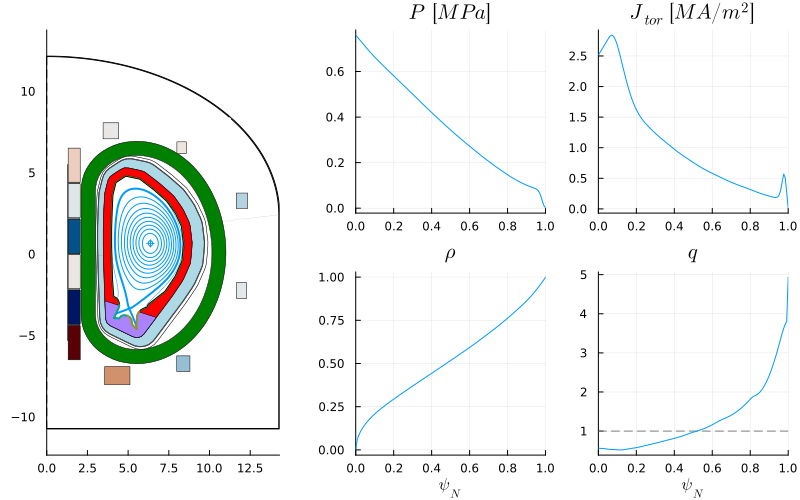

​


22×9 DataFrame
 Row │ group   details  type      ΔR          R_start   R_end     material      area        volume     
     │ String  String   String    Float64     Float64   Float64   String        Float64     Float64    
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                         1.29108      0.0       1.29108                 13.9668      56.6498
   2 │ in               oh        0.713056     1.29108   2.00413  Nb3Sn           7.71378     79.8547
   3 │ in                         0.108804     2.00413   2.11294                  1.17703     15.224
   4 │ hfs              tf        0.883063     2.11294   2.996    Nb3Sn          29.9375     563.557
   5 │ hfs                        0.0155435    2.996     3.01155                  7.65277    370.467
   6 │ hfs                        0.0971466    3.01155   3.10869                  4.36565    182.515
   7 │ hfs                        0.0310869    3.10869   3.13978 

​


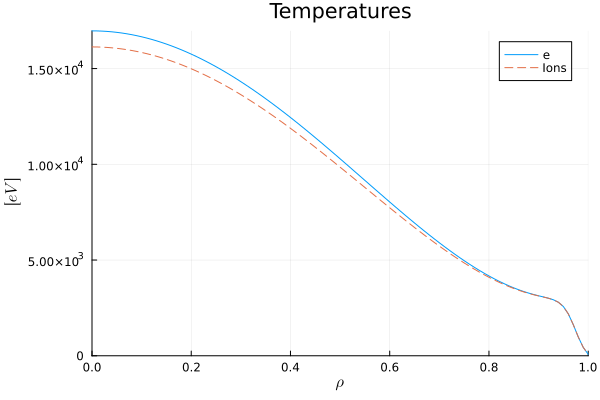

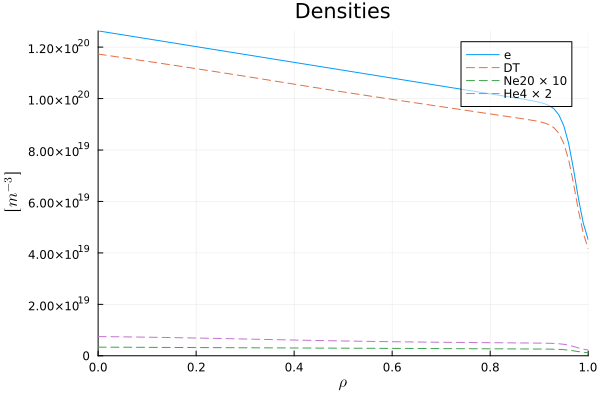

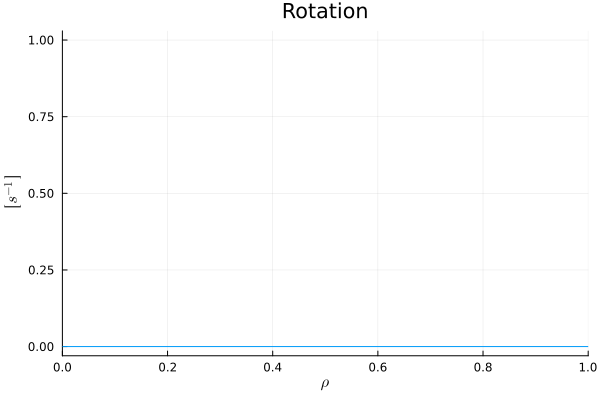

​
​
​


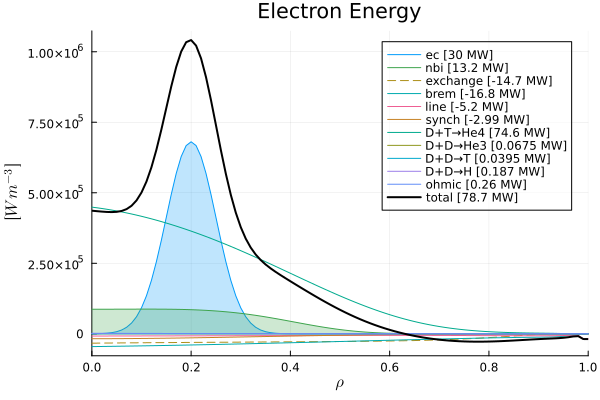

​


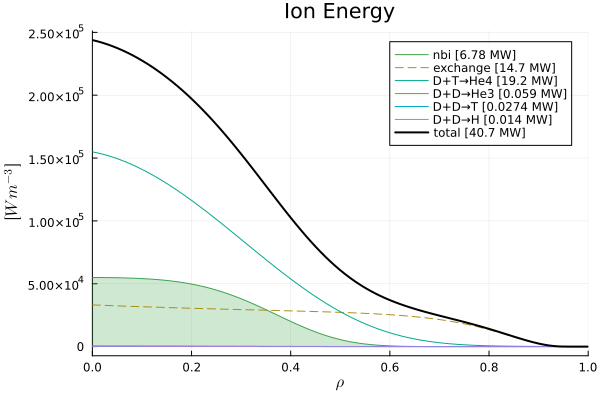

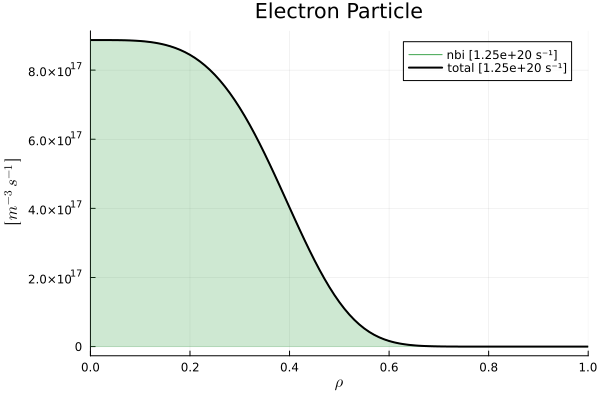

​
​


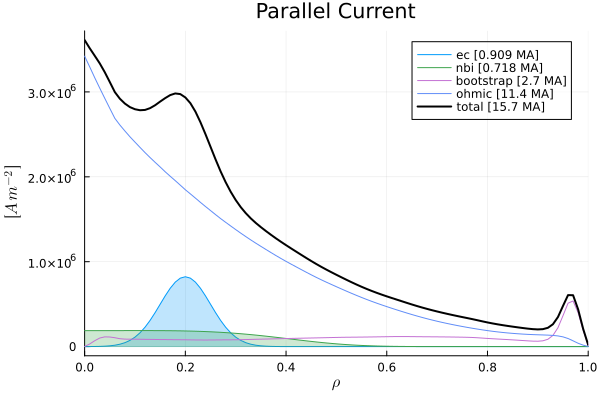

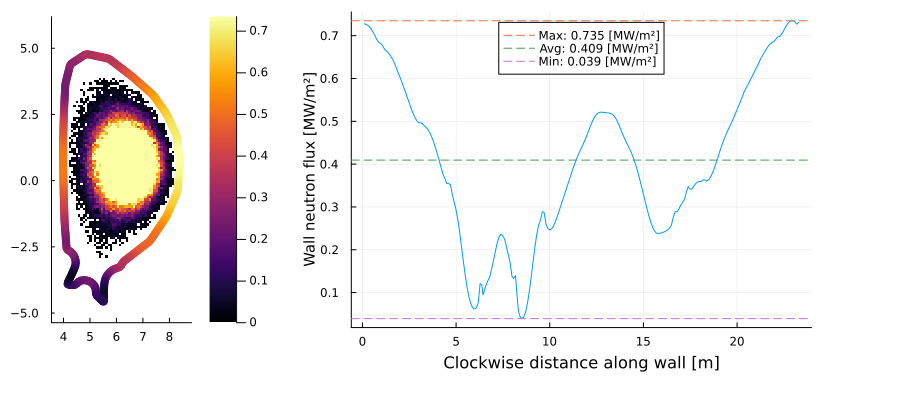

​
​


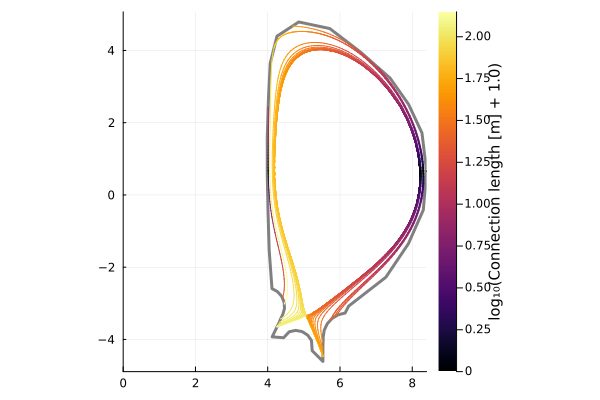

​


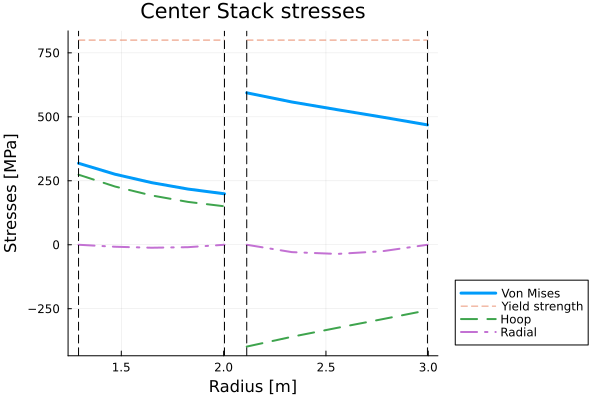

​


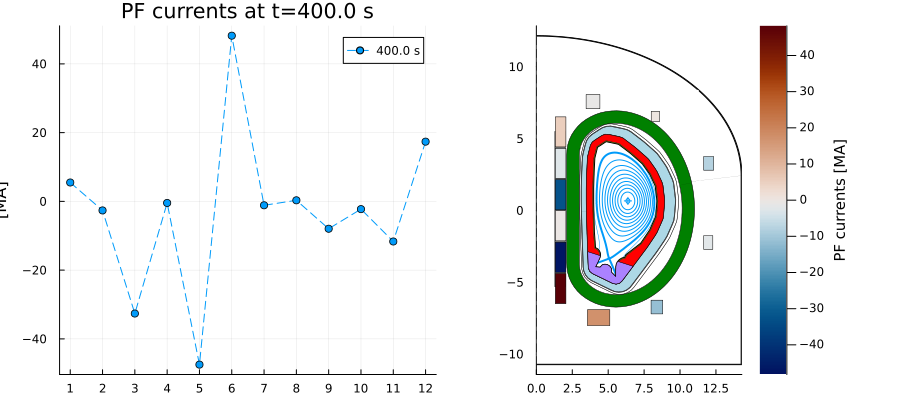

​


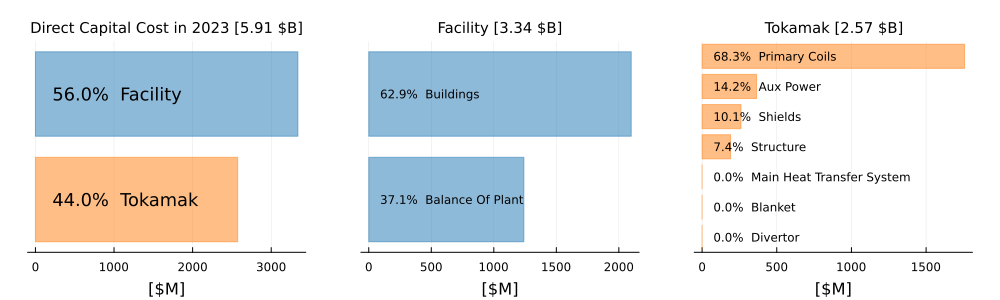

​


In [8]:
FUSE.digest(dd);

### Plot FUSE build on top of ITER drawing


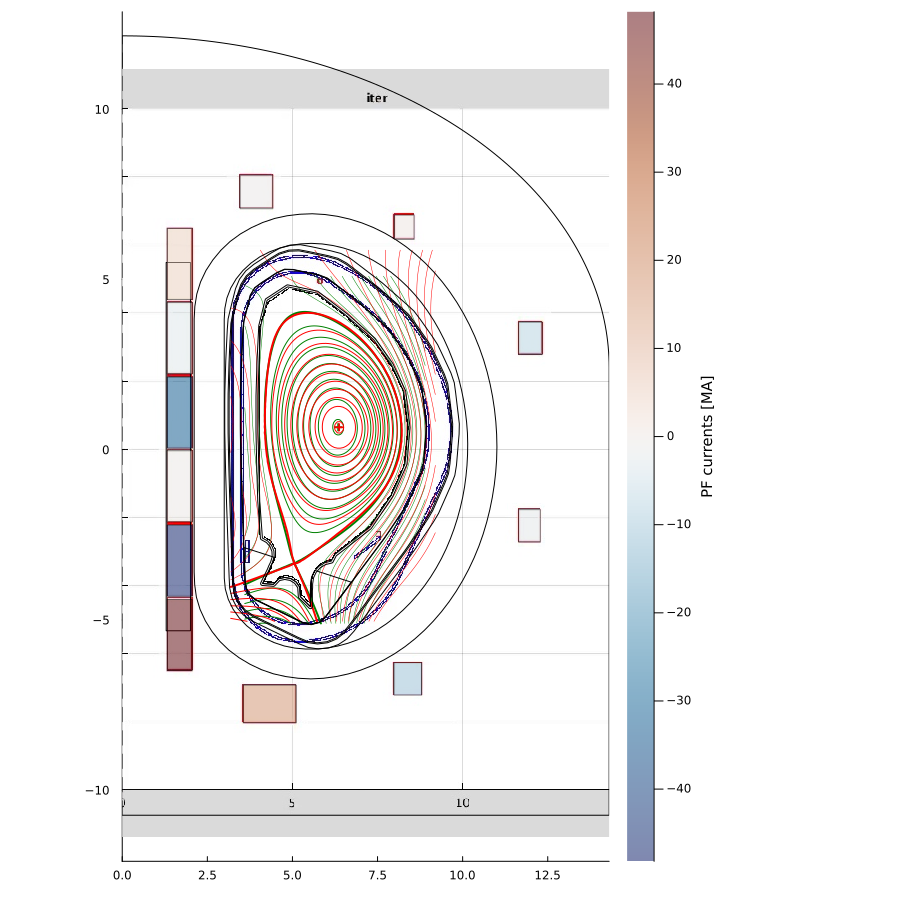

In [9]:
CAD = FUSE.TraceCAD(:ITER)
plot(CAD, size=(900,900))
plot!(dd0.equilibrium, cx=true, color=:green)
plot!(dd.equilibrium, cx=true, color=:red)
plot!(dd.build, wireframe=true, linewidth=1)
plot!(dd.pf_active, wireframe=true, linewidth=1, alpha=0.5)

--------------

In [10]:
function integrate(x, y)
    h = x[2] - x[1]
    n = length(y) - 1
    n % 2 == 0 || error("`y` length (number of intervals) must be odd")
    s = sum(y[1:2:n] + 4 * y[2:2:n] + y[3:2:n+1])
    return h / 3 * s
end

cp1d = dd.core_profiles.profiles_1d[]

display(abs(integrate(cp1d.grid.area, 1 ./ cp1d.conductivity_parallel)))

Vloop = abs(integrate(cp1d.grid.area, cp1d.j_ohmic ./ cp1d.conductivity_parallel))*2*3.14159

4.3502793156657434e-9

0.004478463796554187

In [11]:
display(dd.build.flux_swing)

display(dd.build.oh)

display(dd.build.tf)

display(dd.build.pf_active)

display(dd.pulse_schedule.flux_control)


flux_swing
├─ flattop ➡ 6.63601 [Wb]
├─ pf ➡ -31.2841 [Wb]
└─ rampup ➡ 204.168 [Wb]


oh
├─ critical_b_field ➡ 25 [T]
├─ critical_j ➡ 1.21091e+08 [A/m^2]
├─ flattop_duration ➡ 500 [s]
├─ max_b_field ➡ 10.3633 [T]
├─ max_j ➡ 1.15655e+07 [A/m^2]
└─ technology
   ├─ JxB_strain ➡ 0
   ├─ fraction_steel ➡ 0.46
   ├─ fraction_void ➡ 0.1
   ├─ material ➡ "Nb3Sn"
   ├─ ratio_SC_to_copper ➡ 1
   ├─ temperature ➡ 4.2 [K]
   └─ thermal_strain ➡ 0


tf
├─ coils_n ➡ 18
├─ critical_b_field ➡ 25 [T]
├─ critical_j ➡ 8.75329e+07 [A/m^2]
├─ max_b_field ➡ 10.954 [T]
├─ max_j ➡ 1.15774e+07 [A/m^2]
├─ ripple ➡ 0.01
├─ technology
│  ├─ JxB_strain ➡ 0
│  ├─ fraction_steel ➡ 0.55
│  ├─ fraction_void ➡ 0.1
│  ├─ material ➡ "Nb3Sn"
│  ├─ ratio_SC_to_copper ➡ 1
│  ├─ temperature ➡ 4.2 [K]
│  └─ thermal_strain ➡ 0
└─ wedge_thickness ➡ Function [m]


pf_active
└─ technology
   ├─ JxB_strain ➡ 0
   ├─ fraction_steel ➡ 0.5
   ├─ fraction_void ➡ 0.1
   ├─ material ➡ "NbTi"
   ├─ ratio_SC_to_copper ➡ 1
   ├─ temperature ➡ 4.2 [K]
   └─ thermal_strain ➡ 0


flux_control
├─ i_plasma
│  └─ reference
│     ├─ data ➡ 7-element Vector{Float64} [mixed]
│     └─ time ➡ 7-element Vector{Float64} [s]
└─ loop_voltage
   └─ reference
      ├─ data ➡ [0.0220265] [mixed]
      └─ time ➡ [400] [s]


In [12]:
cp1d = dd.core_profiles.profiles_1d[]
eq = dd.equilibrium.time_slice[]
vloop = IMAS.vloop(cp1d, eq)
flattop_flux = vloop * dd.requirements.flattop_duration

println("vloop = ", vloop)
println("flattop_flux = ", flattop_flux)
println("flattop_duration = ", dd.requirements.flattop_duration)


vloop = 0.022003739643517137
flattop_flux = 11.001869821758568
flattop_duration = 500.0


In [13]:
eq1d = dd.equilibrium.time_slice[].profiles_1d

profiles_1d
├─ area ➡ 129-element Vector{Float64} [m^2]
├─ b_field_average ➡ 129-element Vector{Float64} [T]
├─ b_field_max ➡ 129-element Vector{Float64} [T]
├─ b_field_min ➡ 129-element Vector{Float64} [T]
├─ darea_dpsi ➡ Function [m^2.Wb^-1]
├─ darea_drho_tor ➡ Function [m]
├─ dpressure_dpsi ➡ 129-element Vector{Float64} [Pa.Wb^-1]
├─ dpsi_drho_tor ➡ Function [Wb/m]
├─ dvolume_dpsi ➡ 129-element Vector{Float64} [m^3.Wb^-1]
├─ dvolume_drho_tor ➡ Function [m^2]
├─ elongation ➡ 129-element Vector{Float64}
├─ f ➡ 129-element Vector{Float64} [T.m]
├─ f_df_dpsi ➡ 129-element Vector{Float64} [T^2.m^2/Wb]
├─ fsa_bp ➡ 129-element Vector{Float64} [T]
├─ geometric_axis
│  ├─ r ➡ Function [m]
│  └─ z ➡ Function [m]
├─ gm1 ➡ 129-element Vector{Float64} [m^-2]
├─ gm2 ➡ 129-element Vector{Float64} [m^-2]
├─ gm4 ➡ 129-element Vector{Float64} [T^-2]
├─ gm5 ➡ 129-element Vector{Float64} [T^2]
├─ gm8 ➡ 129-element Vector{Float64} [m]
├─ gm9 ➡ 129-element Vector{Float64} [m^-1]
├─ j_parallel ➡ Function 

In [14]:
# load ITER gfile(s)

using EFIT

gfile = "../../cases/ITER_eqdsk/g100.15000"
g = readg(gfile)

dd1, ini1, act1 = FUSE.init(:ITER, init_from=:ods);
resize!(dd1.equilibrium.time_slice, 1.0)
#dd.equilibrium.time_slice.time[1]=1


[ Info: HCD
[ Info:  ECsimple


[ Info:  ICsimple


[ Info:  LHsimple


[ Info:  NBsimple


[ Info: SteadyStateCurrent


[ Info: CXbuild


3
├─ boundary
│  ├─ elongation ➡ Function
│  ├─ elongation_lower ➡ Function
│  ├─ elongation_upper ➡ Function
│  ├─ geometric_axis
│  │  ├─ r ➡ Function [m]
│  │  └─ z ➡ Function [m]
│  ├─ minor_radius ➡ Function [m]
│  ├─ squareness ➡ Function
│  ├─ squareness_lower_inner ➡ Function
│  ├─ squareness_lower_outer ➡ Function
│  ├─ squareness_upper_inner ➡ Function
│  ├─ squareness_upper_outer ➡ Function
│  ├─ triangularity ➡ Function
│  ├─ triangularity_lower ➡ Function
│  └─ triangularity_upper ➡ Function
├─ global_quantities
│  ├─ energy_mhd ➡ Function [J]
│  ├─ magnetic_axis
│  │  ├─ b_field_tor ➡ Function [T]
│  │  ├─ r ➡ Function [m]
│  │  └─ z ➡ Function [m]
│  ├─ psi_axis ➡ Function [Wb]
│  ├─ psi_boundary ➡ Function [Wb]
│  ├─ q_95 ➡ Function
│  ├─ q_axis ➡ Function
│  └─ q_min
├─ profiles_1d
│  ├─ darea_dpsi ➡ Function [m^2.Wb^-1]
│  ├─ darea_drho_tor ➡ Function [m]
│  ├─ dpressure_dpsi ➡ Function [Pa.Wb^-1]
│  ├─ dpsi_drho_tor ➡ Function [Wb/m]
│  ├─ dvolume_dpsi ➡ Function [m^

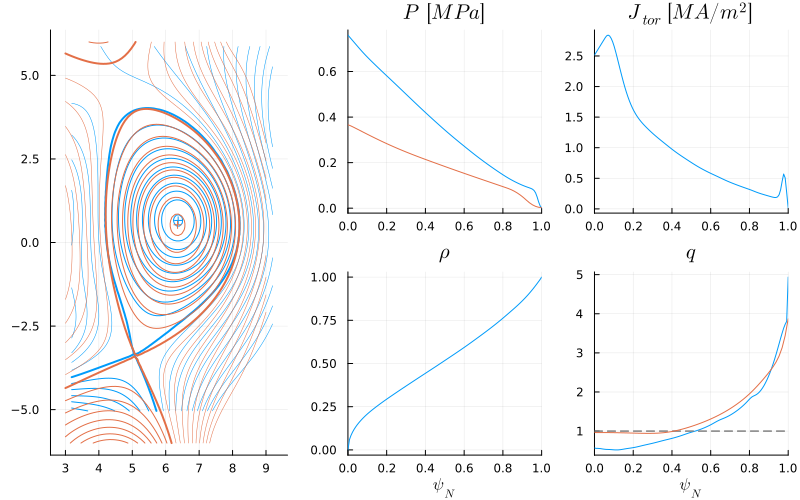

In [15]:

FUSE.gEQDSK2IMAS(g, dd1.equilibrium)

eq1d1 = dd1.equilibrium.time_slice[].profiles_1d
eq1d = dd.equilibrium.time_slice[].profiles_1d

plot(dd.equilibrium, coordinate=:psi_norm)
display(plot!(dd1.equilibrium, coordinate=:psi_norm))


In [21]:
dd.summary.local.pedestal


pedestal
├─ n_e
│  └─ value ➡ [9.02259e+19] [m^-3]
├─ position
│  └─ rho_tor_norm ➡ [0.948636]
├─ t_e
│  └─ value ➡ [2609.39] [eV]
├─ t_i_average
│  └─ value ➡ [2609.39] [eV]
└─ zeff
   └─ value ➡ [1.29]
